In [605]:
!pip install unidecode


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [606]:
import pandas as pd
from unidecode import unidecode
import re
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import math
import numpy as np
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\David\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [607]:
df_train = pd.read_csv("./data/categories/train.csv")
df_test = pd.read_csv("./data/categories/test.csv")
index_test = df_test['index']
df_complete = pd.concat([df_train,df_test])
index = df_complete['index']
titulo = df_complete['titulo']
categoria = df_train['categoria']

In [608]:
df_complete.head(10)

,index,titulo,categoria
0,610,"""De nada sirven los triunfos si la paz no los ...",Película y Animación
1,819,"""Hay mejores formas para uno mostrar su forma ...",Película y Animación
2,637,#LosNacionalesXSeñal - Bahía Cupica,Deportes
3,740,#LosNacionalesXSeñal - Estudiantes Utech balon...,Deportes
4,160,#LosNacionalesXSeñal - Las pruebas de triatlón...,Deportes
5,101,"#LosNacionalesXSeñal - María Elena Hurtado, la...",Deportes
6,405,#LosNacionalesXSeñal - Niños voley playa,Deportes
7,681,#LosNacionalesXSeñal - ¡Hicimos historia!,Deportes
8,428,#PedaleoPor: Ariel Molina envía un saludo a lo...,Deportes
9,13,#PedaleoPor: Ariel Molina envía un saludo a lo...,Deportes


In [609]:
titulo.head(20)

0     "De nada sirven los triunfos si la paz no los ...
1     "Hay mejores formas para uno mostrar su forma ...
2                   #LosNacionalesXSeñal - Bahía Cupica
3     #LosNacionalesXSeñal - Estudiantes Utech balon...
4     #LosNacionalesXSeñal - Las pruebas de triatlón...
5     #LosNacionalesXSeñal - María Elena Hurtado, la...
6              #LosNacionalesXSeñal - Niños voley playa
7             #LosNacionalesXSeñal - ¡Hicimos historia!
8     #PedaleoPor: Ariel Molina envía un saludo a lo...
9     #PedaleoPor: Ariel Molina envía un saludo a lo...
10    #PedaleoPor: Dagoberto López envía un saludo a...
11    #PedaleoPor: Esteban Kekessy envía un saludo a...
12    #PedaleoPor: Henry García envía un saludo a lo...
13    #PedaleoPor: James Guevara envía un saludo a l...
14    #PedaleoPor: Javier Cruz envía un saludo a los...
15    #PedaleoPor: Javier Rodríguez envía un saludo ...
16    #PedaleoPor: Jonathan Devía envía un saludo a ...
17    #PedaleoPor: Jorge Merchán envía un saludo

In [610]:
titulo = titulo.str.lower()

In [611]:
titulo.head(20)

0     "de nada sirven los triunfos si la paz no los ...
1     "hay mejores formas para uno mostrar su forma ...
2                   #losnacionalesxseñal - bahía cupica
3     #losnacionalesxseñal - estudiantes utech balon...
4     #losnacionalesxseñal - las pruebas de triatlón...
5     #losnacionalesxseñal - maría elena hurtado, la...
6              #losnacionalesxseñal - niños voley playa
7             #losnacionalesxseñal - ¡hicimos historia!
8     #pedaleopor: ariel molina envía un saludo a lo...
9     #pedaleopor: ariel molina envía un saludo a lo...
10    #pedaleopor: dagoberto lópez envía un saludo a...
11    #pedaleopor: esteban kekessy envía un saludo a...
12    #pedaleopor: henry garcía envía un saludo a lo...
13    #pedaleopor: james guevara envía un saludo a l...
14    #pedaleopor: javier cruz envía un saludo a los...
15    #pedaleopor: javier rodríguez envía un saludo ...
16    #pedaleopor: jonathan devía envía un saludo a ...
17    #pedaleopor: jorge merchán envía un saludo

In [612]:
titulo = titulo.apply(unidecode)

In [613]:
titulo.head(20)

0     "de nada sirven los triunfos si la paz no los ...
1     "hay mejores formas para uno mostrar su forma ...
2                   #losnacionalesxsenal - bahia cupica
3     #losnacionalesxsenal - estudiantes utech balon...
4     #losnacionalesxsenal - las pruebas de triatlon...
5     #losnacionalesxsenal - maria elena hurtado, la...
6              #losnacionalesxsenal - ninos voley playa
7             #losnacionalesxsenal - !hicimos historia!
8     #pedaleopor: ariel molina envia un saludo a lo...
9     #pedaleopor: ariel molina envia un saludo a lo...
10    #pedaleopor: dagoberto lopez envia un saludo a...
11    #pedaleopor: esteban kekessy envia un saludo a...
12    #pedaleopor: henry garcia envia un saludo a lo...
13    #pedaleopor: james guevara envia un saludo a l...
14    #pedaleopor: javier cruz envia un saludo a los...
15    #pedaleopor: javier rodriguez envia un saludo ...
16    #pedaleopor: jonathan devia envia un saludo a ...
17    #pedaleopor: jorge merchan envia un saludo

In [614]:
def quitar_caracteres_especiales(texto):
    return re.sub(r'[^A-Za-z ]+', '', texto)
titulo = titulo.apply(quitar_caracteres_especiales)

In [615]:
titulo.head(20)

0     de nada sirven los triunfos si la paz no los c...
1     hay mejores formas para uno mostrar su forma d...
2                     losnacionalesxsenal  bahia cupica
3      losnacionalesxsenal  estudiantes utech balonmano
4     losnacionalesxsenal  las pruebas de triatlon l...
5     losnacionalesxsenal  maria elena hurtado la pe...
6                losnacionalesxsenal  ninos voley playa
7                 losnacionalesxsenal  hicimos historia
8     pedaleopor ariel molina envia un saludo a los ...
9     pedaleopor ariel molina envia un saludo a los ...
10    pedaleopor dagoberto lopez envia un saludo a l...
11    pedaleopor esteban kekessy envia un saludo a l...
12    pedaleopor henry garcia envia un saludo a los ...
13    pedaleopor james guevara envia un saludo a los...
14    pedaleopor javier cruz envia un saludo a los e...
15    pedaleopor javier rodriguez envia un saludo a ...
16    pedaleopor jonathan devia envia un saludo a lo...
17    pedaleopor jorge merchan envia un saludo a

In [616]:
def obtener_palabras_unicas(texto, diccionario):
    palabras = re.findall(r'\b\w+\b', texto)
    for palabra in palabras:
        diccionario[palabra] = 0
        
palabras_unicas = {}

titulo.apply(lambda x: obtener_palabras_unicas(x, palabras_unicas))

df_palabras_unicas = pd.DataFrame(palabras_unicas.keys(), columns=["Palabra"])
df_palabras_unicas.head(20)

,Palabra
0,de
1,nada
2,sirven
3,los
4,triunfos
5,si
6,la
7,paz
8,no
9,corona


In [617]:
len(df_palabras_unicas)

1848

In [618]:
df_matriz_frecuencia = pd.DataFrame(palabras_unicas, index=titulo)
df_matriz_frecuencia.iloc[:,:7]

,de,nada,sirven,los,triunfos,si,la
titulo,,,,,,,
de nada sirven los triunfos si la paz no los corona lapazhabla,0,0,0,0,0,0,0
hay mejores formas para uno mostrar su forma de pensar sofia,0,0,0,0,0,0,0
losnacionalesxsenal bahia cupica,0,0,0,0,0,0,0
losnacionalesxsenal estudiantes utech balonmano,0,0,0,0,0,0,0
losnacionalesxsenal las pruebas de triatlon llenaron de emocion al municipio de prado,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
como ensenarle a los papas a reciclar,0,0,0,0,0,0,0
como es tu municipio los ninos de paicol nos cuentan,0,0,0,0,0,0,0
los ninos podemos cambiar el mundo,0,0,0,0,0,0,0


In [619]:
df_matriz_frecuencia.columns

Index(['de', 'nada', 'sirven', 'los', 'triunfos', 'si', 'la', 'paz', 'no',
       'corona',
       ...
       'ensenarle', 'papas', 'reciclar', 'paicol', 'cuentan', 'podemos',
       'cambiar', 'ejemplar', 'dan', 'opinion'],
      dtype='object', length=1848)

In [620]:
for indice, fila in df_matriz_frecuencia.iterrows():
    for palabra in df_matriz_frecuencia.columns:
        titulo_interno = fila.name
        df_matriz_frecuencia.at[fila.name,palabra] = titulo_interno.split().count(palabra)

KeyboardInterrupt: 

In [ ]:
df_matriz_frecuencia.iloc[:,:7]

In [ ]:
#Stemmer
stop_words = set(stopwords.words('spanish'))
def simple_stemmer(text):
    stemmer = SnowballStemmer("spanish")
    tokenizers = ToktokTokenizer()
    tokens = tokenizers.tokenize(text)
    tokens = [stemmer.stem(token.strip()) for token in tokens if token not in stop_words]
    text = " ".join(tokens)
    return text

titulo = titulo.apply(simple_stemmer)

In [ ]:
titulo.head(10)

In [ ]:
df_corr_dummies = pd.get_dummies(df_complete['categoria'].head(800), columns=['categoria'], drop_first=True)
df_corr_dummies.corr()

In [ ]:
plt.Figure(figsize=(8,6))
sns.heatmap(df_corr_dummies.corr(),annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

# Term Frequency (Matriz TF)

In [ ]:
palabras_unicas = {}

titulo.apply(lambda x: obtener_palabras_unicas(x, palabras_unicas))

df_palabras_unicas = pd.DataFrame(palabras_unicas.keys(), columns=["Palabra"])
df_palabras_unicas.head(20)

In [ ]:
len(df_palabras_unicas)

In [ ]:
df_matriz_TF = pd.DataFrame(palabras_unicas, index=titulo)
df_matriz_frecuencia = pd.DataFrame(palabras_unicas, index=titulo)
df_matriz_TF.iloc[:,:7]

In [ ]:
# Definir la nueva matriz de frecuencia con las nuevas palabras y hacer el conteo de cada palabra en cada titulo
df_matriz_frecuencia = df_matriz_frecuencia.astype(float)
for indice, fila in df_matriz_frecuencia.iterrows():
    for palabra in df_matriz_frecuencia.columns:
        titulo_interno = fila.name
        titulo_interno_vector = titulo_interno.split()
        df_matriz_frecuencia.at[titulo_interno,palabra] = titulo_interno_vector.count(palabra)

In [ ]:
df_matriz_frecuencia.iloc[:,:7]

In [ ]:
df_matriz_TF = df_matriz_TF.astype(float)
for indice, fila in df_matriz_TF.iterrows():
    titulo_interno = fila.name
    titulo_interno_vector = titulo_interno.split()
    for palabra in df_matriz_TF.columns:
        df_matriz_TF.at[titulo_interno,palabra] = (titulo_interno_vector.count(palabra))/len(titulo_interno_vector)
df_matriz_TF.iloc[:,:7]

# Inverse Document Frequency (Vector IDF)

In [ ]:
cantidad_documentos = len(df_matriz_frecuencia)
df_matriz_IDF = pd.DataFrame(columns=['Transformacion'], index=palabras_unicas)
for indice, fila in df_matriz_IDF.iterrows():
    palabra_interna = fila.name
    cantidad_total_palabra = df_matriz_frecuencia[f'{palabra_interna}'].sum()
    df_matriz_IDF.loc[palabra_interna] = math.log(cantidad_documentos/(cantidad_total_palabra+1))
df_matriz_IDF.iloc[:,:7]

In [ ]:
df_matriz_IDF = df_matriz_IDF.transpose()

In [ ]:
df_matriz_tf_idf = df_matriz_TF.copy()

In [ ]:
for indice, fila in df_matriz_TF.iterrows():
    titulo_interno = fila.name
    for palabra in df_matriz_TF.columns:
        df_matriz_tf_idf.at[titulo_interno,palabra] = df_matriz_tf_idf.at[titulo_interno,palabra]*df_matriz_IDF.at['Transformacion',palabra]

In [ ]:
df_matriz_tf_idf.iloc[:,:7]

# Entrenamientos:
### Regresion logistica

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from  sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(df_matriz_tf_idf.head(800),categoria,test_size=0.2)

In [ ]:
count_vect = CountVectorizer(min_df=1, max_df=100000, binary=False, ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(df_train)
count_vect_test = count_vect.transform(df_test)

In [ ]:
logistic_model = LogisticRegression(penalty="l2", max_iter=800, C=1.0, random_state=42)

In [ ]:
logistic_model.fit(X_train, y_train)

In [ ]:
logistic_prediction = logistic_model.predict(X_test)

Evaluemos las metricas sobre los mismos datos que estamos entrenando

In [ ]:
print(f'Exactitud: {accuracy_score(y_test,logistic_prediction)}')

In [ ]:
df_train['categoria'].unique()

In [ ]:
matriz_confusion_regresion = confusion_matrix(y_test, logistic_prediction)
sns.heatmap(matriz_confusion_regresion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión Para Regresion Logistica')
plt.show()

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_prediction = random_forest_model.predict(X_test)

In [ ]:
print(f'Exactitud: {accuracy_score(y_test,random_forest_prediction)}')

In [ ]:
matriz_confusion_rf = confusion_matrix(y_test, random_forest_prediction)
sns.heatmap(matriz_confusion_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión Para Random Forest')
plt.show()

### LSTM

In [ ]:
from keras.models import Sequential
from keras import layers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
from sklearn.preprocessing import LabelBinarizer

In [662]:
label = LabelBinarizer()
max_words = 1700
max_len = 15
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_train["titulo"])
sequences = tokenizer.texts_to_sequences(df_train["titulo"])
sequences = pad_sequences(sequences, maxlen=max_len)
y = label.fit_transform(categoria)
X_train, X_test, y_train, y_test = train_test_split(sequences, y, test_size=0.1)

In [663]:
from keras.src.callbacks import EarlyStopping

lstm_model = Sequential()
lstm_model.add(layers.Embedding(input_dim=max_words, output_dim=100, input_length=max_len))
lstm_model.add(layers.SpatialDropout1D(0.7))
lstm_model.add(layers.LSTM(128, dropout=0.7, recurrent_dropout=0.7))
lstm_model.add(layers.Dense(6, activation='softmax'))
lstm_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = lstm_model.fit(X_train,y_train, epochs=100, validation_data=(X_test,y_test),batch_size=512, callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

Epoch 1/100
2/2 [==============================] - 31s 25s/step - loss: 1.7873 - accuracy: 0.2194 - val_loss: 1.7602 - val_accuracy: 0.3375
Epoch 2/100
2/2 [==============================] - 2s 1s/step - loss: 1.7604 - accuracy: 0.2972 - val_loss: 1.7104 - val_accuracy: 0.3375
Epoch 3/100
2/2 [==============================] - 1s 520ms/step - loss: 1.7227 - accuracy: 0.2736 - val_loss: 1.6346 - val_accuracy: 0.3375
Epoch 4/100
2/2 [==============================] - 1s 440ms/step - loss: 1.6817 - accuracy: 0.2750 - val_loss: 1.6165 - val_accuracy: 0.3375
Epoch 5/100
2/2 [==============================] - 1s 441ms/step - loss: 1.6636 - accuracy: 0.2944 - val_loss: 1.5731 - val_accuracy: 0.3375
Epoch 6/100
2/2 [==============================] - 1s 442ms/step - loss: 1.6575 - accuracy: 0.2889 - val_loss: 1.5850 - val_accuracy: 0.3500
Epoch 7/100
2/2 [==============================] - 1s 466ms/step - loss: 1.6518 - accuracy: 0.3097 - val_loss: 1.5659 - val_accuracy: 0.4125
Epoch 8/100
2/2 [

In [664]:
accr = lstm_model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

3/3 [==============================] - 0s 37ms/step - loss: 0.9572 - accuracy: 0.6500
Test set
  Loss: 0.957
  Accuracy: 0.650


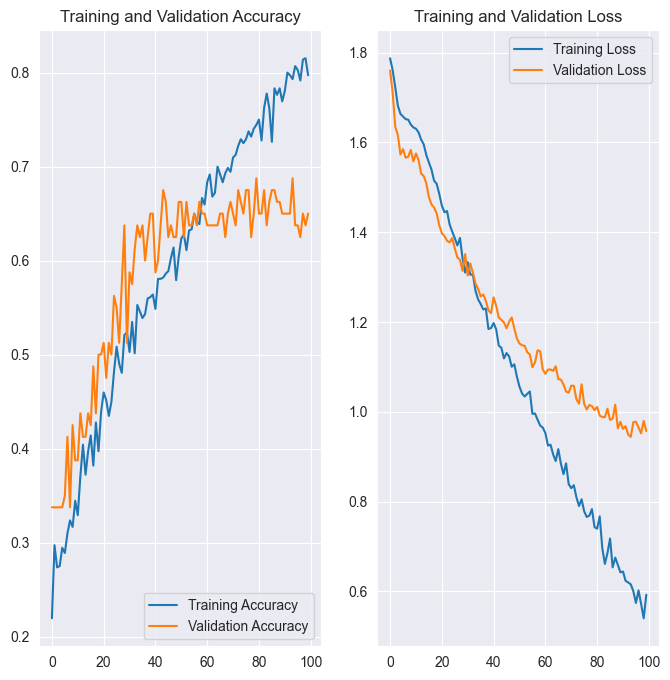

In [666]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(100)

plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [667]:
lstm_prediction = lstm_model.predict(X_test)

3/3 [==============================] - 1s 35ms/step


In [668]:
lstm_prediction = np.argmax(lstm_prediction, axis=1)
y_real = np.argmax(y_test, axis=1)

In [669]:
print(f'Exactitud: {accuracy_score(y_real,lstm_prediction)}')

Exactitud: 0.65


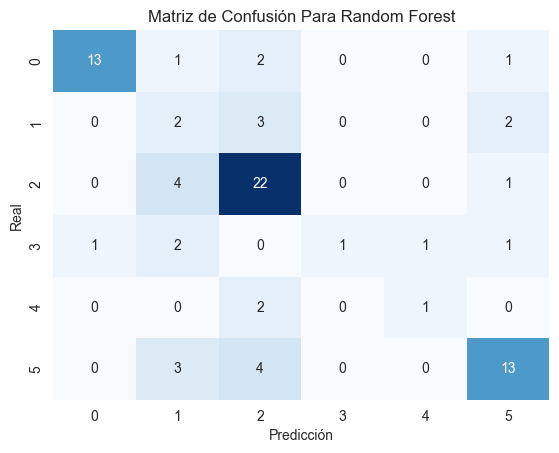

In [670]:
matriz_confusion_rf = confusion_matrix(y_real, lstm_prediction)
sns.heatmap(matriz_confusion_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión Para Random Forest')
plt.show()

# Resultado final
Para este caso ya no vamos a divir el modelo de entrenamiento sino que vamos a entrenar completamente cada modelo con todos los datos de etrenamiento

### Regresion Logistica

In [ ]:
logistic_model = LogisticRegression(penalty="l2", max_iter=800, C=1.0, random_state=42)
logistic_model.fit(df_matriz_tf_idf.head(800), categoria)

Se escogen los ultimos 200 datos ya que esos son los datos de test que fusionamos anteriormente

In [ ]:
logistic_prediction = logistic_model.predict(df_matriz_tf_idf.tail(200))

In [ ]:
df_answer_logistic = pd.DataFrame(data= zip(index_test,logistic_prediction),
                         columns=["ID","categoria"])

In [ ]:
df_answer_logistic.to_csv("./predictions/categories/prediction_logistic.csv", index=False)

### Random Forest

In [ ]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(df_matriz_tf_idf.head(800), categoria)

In [ ]:
random_forest_prediction = random_forest_model.predict(df_matriz_tf_idf.tail(200))

In [ ]:
df_answer_random_forest = pd.DataFrame(data= zip(index_test,random_forest_prediction),
columns=["ID","categoria"])

In [ ]:
df_answer_random_forest.to_csv("./predictions/categories/prediction_random_forest.csv", index=False)

### LSTM

In [638]:
label = LabelBinarizer()
max_words = 1000
max_len = 15
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(titulo.head(800))
sequences = tokenizer.texts_to_sequences(titulo.head(800))
sequences = pad_sequences(sequences, maxlen=max_len)
y = label.fit_transform(categoria)

In [ ]:
lstm_model = Sequential()
lstm_model.add(layers.Embedding(input_dim=max_words, output_dim=108, input_length=max_len))
lstm_model.add(layers.Bidirectional(layers.LSTM(128)))
lstm_model.add(layers.Dropout(0.5))
lstm_model.add(layers.Dense(6, activation='softmax'))
lstm_model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = lstm_model.fit(sequences, y, epochs=15, batch_size=512) 

In [683]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df_test)
sequences = tokenizer.texts_to_sequences(df_test)
sequences = pad_sequences(sequences, maxlen=max_len)

In [684]:
lstm_prediction = lstm_model.predict(sequences)
lstm_prediction = label.inverse_transform(lstm_prediction)

1/1 [==============================] - 0s 210ms/step


In [685]:
df_answer_lstm = pd.DataFrame(data= zip(index_test,lstm_prediction),
                                       columns=["ID","categoria"])

In [679]:
df_answer_lstm.to_csv("./predictions/categories/prediction_lstm.csv", index=False)